In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import os
from termcolor import colored
import seaborn as sns
from scipy import stats
import plotly.express as px
from plotly.figure_factory import create_scatterplotmatrix

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from sklearn.metrics import confusion_matrix

c:\Users\iaram\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\iaram\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\iaram\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [5]:
data = pd.read_csv('cardio_train.csv',sep=';')

#### Descrição dos dados:
O conjunto de dados de doenças cardiovasculares é composto por 70.000 registros de pacientes de 1 a 107 anos, sendo 34.979 homens e 45.241 mulheres. O conjunto de dados contém 11 recursos, 10 variáveis de entrada e 1 variável de saída. O objetivo é prever a presença ou ausência de doenças cardiovasculares (CVD) usando os dados disponíveis no momento da consulta médica.

Existem 3 tipos de dados nesse dataset
<li> Objective: factual information;
<li> Examination: results of medical examination;
<li> Subjective: information given by the patient.

Colunas:
<li> Age | Objective Feature | age | int (days)
<li> Height | Objective Feature | height | int (cm) |
<li> Weight | Objective Feature | weight | float (kg) |
<li> Gender | Objective Feature | gender | categorical code |
<li> Systolic blood pressure | Examination Feature | ap_hi | int |
<li> Diastolic blood pressure | Examination Feature | ap_lo | int |
<li> Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
<li> Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
<li> Smoking | Subjective Feature | smoke | binary |
<li> Alcohol intake | Subjective Feature | alco | binary |
<li> Physical activity | Subjective Feature | active | binary |
<li> Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

In [6]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
data.isna().sum() #0 indicates no missing values in the dataset

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [8]:
data.shape

(70000, 13)

In [11]:
data['age'] = data['age'] / 365
data['gender'] = data['gender'].replace({1: 0, 2: 1})

data['IMC'] = data['weight'] / (data['height']/100) ** 2

data['ap_hi'] = abs(data['ap_hi'])
data['ap_lo'] = abs(data['ap_lo'])

data['age'] = data['age'].astype(int)

In [12]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,IMC
0,0,0,1,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,0,0,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,0,0,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,0,1,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,0,0,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [13]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,IMC
count,70000.000000,70000.0,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,0.0,0.349571,164.359229,74.205690,128.841429,96.632414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,27.556513
std,28851.302323,0.0,0.476838,8.210126,14.395757,153.991223,188.471505,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.091511
min,0.000000,0.0,0.000000,55.000000,10.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784
25%,25006.750000,0.0,0.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,50001.500000,0.0,0.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.374068
75%,74889.250000,0.0,1.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.222222
max,99999.000000,0.0,1.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,298.666667


In [14]:
data = data[~((data.ap_hi < 60) | (data.ap_hi > 250) | (data.ap_lo < 30) | (data.ap_lo > 200) | (data['ap_hi'] <= data['ap_lo']))]
data = data[~((data['weight'] < 30) | (data['height'] > 220))]
data = data[~((data['IMC'] < 10) | (data['IMC'] > 55))]
data.shape

(68547, 14)

Em uma leitura típica da pressão arterial, a pressão sistólica (ap_hi) representa a pressão máxima exercida nas artérias quando o coração se contrai, enquanto a pressão diastólica (ap_lo) representa a pressão mínima quando o coração está em repouso entre os batimentos. Normalmente, a pressão sistólica deve ser maior que a pressão diastólica.

A condição data['ap_hi'] < data['ap_lo'] verifica se a pressão sistólica (ap_hi) é menor que a diastólica (ap_lo). Esta condição é incluída para identificar casos em que os valores de pressão arterial registrados são potencialmente errôneos ou inconsistentes com o padrão fisiológico esperado.

Em uma medida de pressão arterial válida, a pressão sistólica deve ser maior ou igual à pressão diastólica. Se esta condição for atendida, sugere que os valores da pressão arterial podem ter sido registrados incorretamente ou houve algum erro no processo de medição.

Ao incluir a condição data['ap_hi'] < data['ap_lo'] na expressão de filtragem, você pode identificar e potencialmente remover linhas do DataFrame onde a pressão sistólica registrada é menor que a pressão diastólica, pois é incomum e improvável cenário.

In [15]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,IMC
count,68547.000000,68547.0,68547.000000,68547.000000,68547.000000,68547.000000,68547.000000,68547.000000,68547.000000,68547.000000,68547.000000,68547.000000,68547.000000,68547.000000
mean,49975.513764,0.0,0.348710,164.432842,74.044027,126.668942,81.299225,1.364699,1.225714,0.088027,0.053336,0.803332,0.494595,27.418711
std,28842.035585,0.0,0.476565,7.863273,14.097124,16.687825,9.464562,0.678907,0.571548,0.283337,0.224704,0.397482,0.499974,5.129947
min,0.000000,0.0,0.000000,109.000000,30.000000,60.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.726644
25%,25009.500000,0.0,0.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,50016.000000,0.0,0.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.346494
75%,74861.500000,0.0,1.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.116213
max,99999.000000,0.0,1.000000,207.000000,180.000000,240.000000,182.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,54.968837


In [10]:
data['cardio'].value_counts()

0    34644
1    33903
Name: cardio, dtype: int64

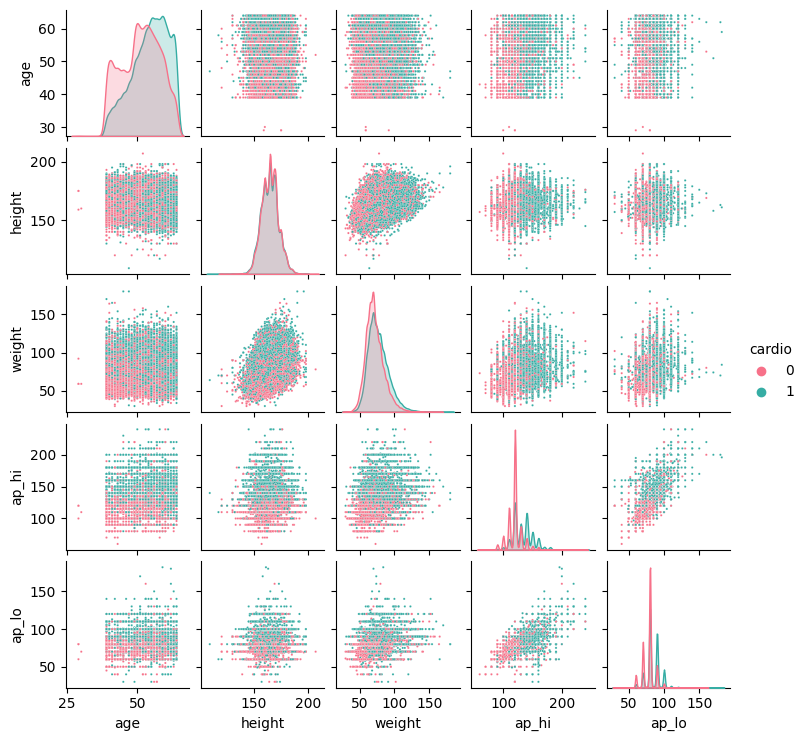

In [31]:
sns.pairplot(data, hue='cardio', vars=['age', 'height', 'weight', 'ap_hi', 'ap_lo'], palette='husl', height=1.5,aspect=1, plot_kws={ 's': 2.5 })
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

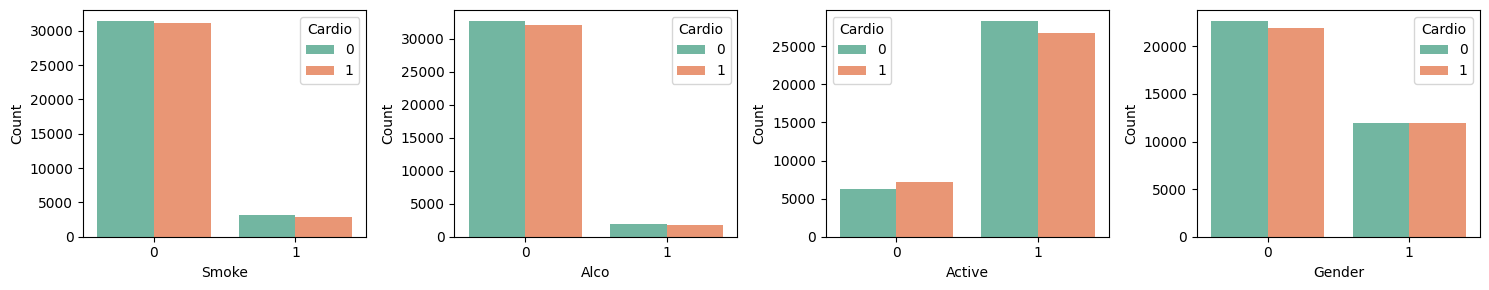

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 3))

df_categorical_1 = data.loc[:, ['smoke', 'alco', 'active', 'gender', 'cardio']]
df_categorical_1['cardio'] = df_categorical_1['cardio'].astype(str)

for i, variable in enumerate(['smoke', 'alco', 'active', 'gender']):
    ax = sns.countplot(x=variable, hue='cardio', data=df_categorical_1, ax=axes[i], palette='Set2')
    ax.set_xlabel(variable.capitalize())
    ax.set_ylabel('Count')
    ax.legend(title='Cardio', labels=['0', '1'])

plt.tight_layout()
plt.show()

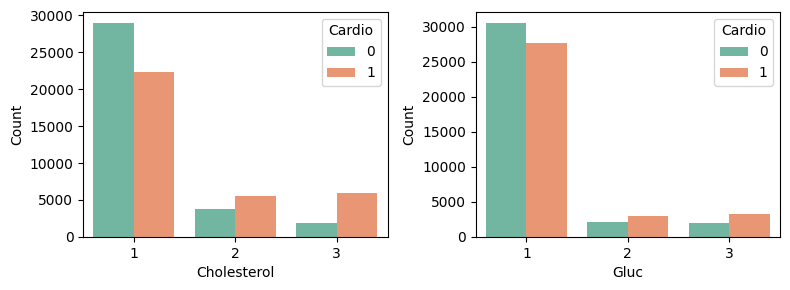

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))

df_categorical_2 = data.loc[:,['cholesterol', 'gluc', 'cardio']]
df_categorical_2['cardio'] = df_categorical_1['cardio'].astype(str)
for i, variable in enumerate(['cholesterol', 'gluc']):
    ax = sns.countplot(x=variable, hue='cardio', data=data, ax=axes[i], palette='Set2')
    ax.set_xlabel(variable.capitalize())
    ax.set_ylabel('Count')
    ax.legend(title='Cardio', labels=['0', '1'])

plt.tight_layout()
plt.show()

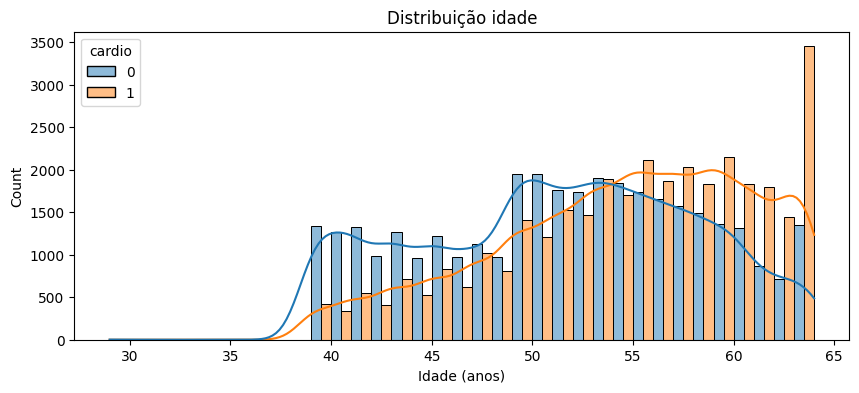

In [14]:
plt.figure(figsize=(10,4))
sns.histplot(x='age',hue='cardio',data=data, binwidth=1, kde=True, multiple='dodge')
plt.title('Distribuição idade')
plt.xlabel('Idade (anos)')
plt.show()

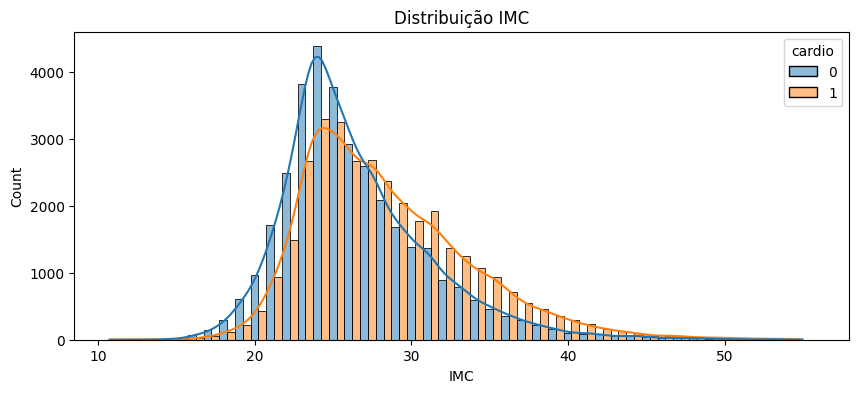

In [15]:
plt.figure(figsize=(10,4))
sns.histplot(x='IMC',hue='cardio',data=data, binwidth=1, kde=True, multiple='dodge')
plt.title('Distribuição IMC')
plt.show()

[Text(0, 0.5, '')]

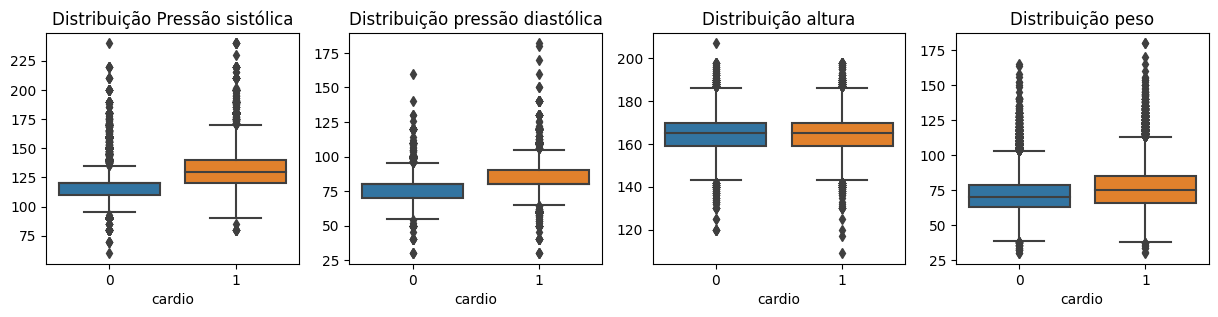

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,3))
#boxplot
p1 = sns.boxplot(x='cardio', y='ap_hi', data=data, ax=axes[0])
p1.set_title('Distribuição Pressão sistólica')
p1.set(ylabel=None)

p2 = sns.boxplot(x='cardio', y='ap_lo', data=data, ax=axes[1])
p2.set_title('Distribuição pressão diastólica')
p2.set(ylabel=None)

p3 = sns.boxplot(x='cardio', y='height', data=data, ax=axes[2])
p3.set_title('Distribuição altura')
p3.set(ylabel=None)

p4 = sns.boxplot(x='cardio', y='weight', data=data, ax=axes[3])
p4.set_title('Distribuição peso')
p4.set(ylabel=None)



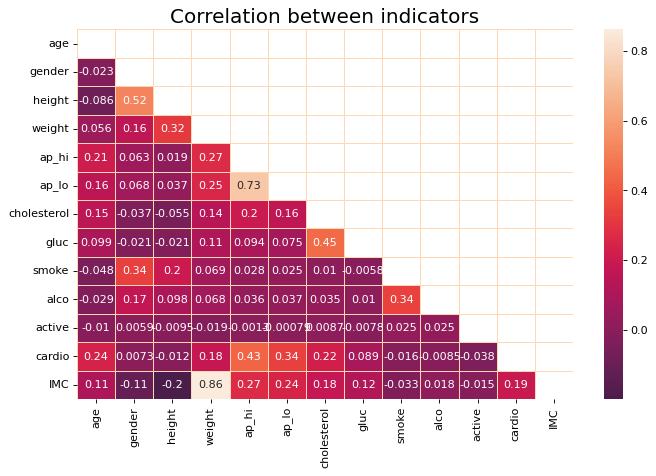

In [17]:
# Correlation matrix
df = data.loc[:, data.columns != 'id']
plt.figure(figsize=(10,6), dpi= 80)
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), mask=matrix, xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='rocket',
             center=0.2, linewidths=0.5, linecolor='#ffd8b1', annot=True)

plt.title('Correlation between indicators', fontsize=18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [18]:
data.to_csv('cardio_train_clean.csv', index=False)

In [19]:
y = data['cardio']
X = data.drop(['cardio'], axis=1)

train, test, target, target_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
# Logistic Regression

logreg = LogisticRegression()
predictor = logreg.fit(train, target)
acc_log = round(logreg.score(train, target) * 100, 4)
acc_log

70.1471

In [22]:
y_pred = predictor.predict(test)
accuracy_log_reg = accuracy_score(target_test, y_pred)
print('Accuracy: ', accuracy_log_reg)

NameError: name 'accuracy_score' is not defined

In [23]:
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
5,ap_lo,5.107607e-02
4,ap_hi,2.165104e-02
6,cholesterol,9.993532e-03
7,gluc,3.515384e-03
8,smoke,7.476520e-04
2,height,6.168472e-04
1,gender,0.000000e+00
0,age,-5.263537e-07
10,active,-8.969503e-05
9,alco,-1.027646e-04
